### 로이터뉴스 카테고리 다중분류 

#### 평가문항	
1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?
    - 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.
2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?
    - Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.
3. 생성모델의 metric(BLEU 등) 기준 이상 높은 성능이 확인되었는가?
    - 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.

### 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 빈도수 상위 5000개 단어만 사용
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [3]:
# 모든 단어 사용
(ax_train, ay_train), (ax_test, ay_test) = reuters.load_data(num_words=None, test_split=0.2)

In [4]:
# 빈도수 2000개 단어 사용
(cx_train, cy_train), (cx_test, cy_test) = reuters.load_data(num_words=2000, test_split=0.2)

In [5]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [6]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [7]:
print(y_train[0])
print(y_test[0])

3
3


In [8]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


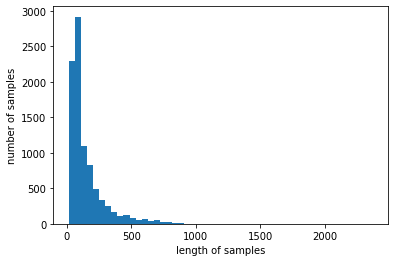

In [9]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

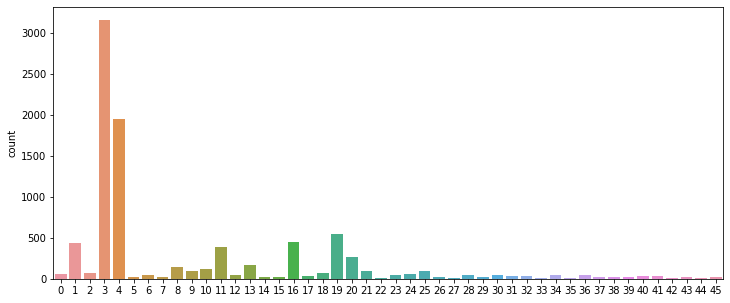

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [12]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [13]:
word_index['the']

1

In [14]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [15]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [16]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [17]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [18]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [19]:
len(x_train)

8982

In [20]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [21]:
len(x_test)

2246

In [22]:
decoded2 = []
for i in range(len(ax_train)):
    t2 = ' '.join([index_to_word[index] for index in ax_train[i]])
    decoded2.append(t2)

ax_train = decoded2

In [23]:
decoded2_test = []
for i in range(len(ax_test)):
    t = ' '.join([index_to_word[index] for index in ax_test[i]])
    decoded2_test.append(t)

ax_test = decoded2_test

In [24]:
decoded3 = []
for i in range(len(cx_train)):
    t3 = ' '.join([index_to_word[index] for index in cx_train[i]])
    decoded3.append(t3)

cx_train = decoded3

In [25]:
decoded3_test = []
for i in range(len(cx_test)):
    t = ' '.join([index_to_word[index] for index in cx_test[i]])
    decoded3_test.append(t)

cx_test = decoded3_test

In [26]:
cx_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of <unk> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <unk> operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> <unk> de <unk> <unk> lt <unk> <unk> and lt <unk> overseas corp of chicago have each taken 50 pct <unk> in <unk> company <unk> <unk> factors <unk> de <unk> said in a statement it gave no financial details of the transaction <unk> <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 <unk> 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [27]:
cx_test[:5]

['<sos> the great <unk> and pacific <unk> co said its three year <unk> mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations <unk> 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the <unk> capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> <unk> sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the current <unk

### 벡터화

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
#5000 단어 벡터화
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [30]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [42]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
tfidfv.shape, tfidfv_test.shape
# predicted = mod1.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

((8982, 9670), (2246, 1944))

In [31]:
#모든 단어 벡터화
dtmvector = CountVectorizer()
ax_train_dtm = dtmvector.fit_transform(ax_train)
print(ax_train_dtm.shape)

(8982, 26506)


In [32]:
tfidf_transformer = TfidfTransformer()
atfidfv = tfidf_transformer.fit_transform(ax_train_dtm)
print(atfidfv.shape)

(8982, 26506)


In [33]:
# 2500 단어 벡터화
dtmvector = CountVectorizer()
cx_train_dtm = dtmvector.fit_transform(cx_train)
print(cx_train_dtm.shape)

(8982, 1944)


In [34]:
ctfidf_transformer = TfidfTransformer()
ctfidfv = tfidf_transformer.fit_transform(cx_train_dtm)
print(ctfidfv.shape)

(8982, 1944)


### 나이브 베이즈 분류기

In [35]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계

In [36]:
#5000단어 모델 학습
mod1 = MultinomialNB()
mod1.fit(tfidfv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [44]:

predicted = mod1.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

ValueError: dimension mismatch

In [45]:
#모든단어 모델 학습
mod2 = MultinomialNB()
mod2.fit(atfidfv, ay_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
#2500단어 모델 학습
mod3 = MultinomialNB()
mod3.fit(ctfidfv, cy_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
tfidfv_test.shape

In [ ]:
predicted.shape

In [ ]:
y_test.shape

In [48]:
#ax_test_dtm = dtmvector.transform(ax_test) #테스트 데이터를 DTM으로 변환
atfidfv_test = tfidf_transformer.transform(ax_test_dtm) #DTM을 TF-IDF 행렬로 변환

apredicted = mod2.predict(atfidfv_test) #테스트 데이터에 대한 예측
print("모든 단어 정확도:", accuracy_score(ay_test, apredicted)) #예측값과 실제값 비교

ValueError: dimension mismatch

ValueError: dimension mismatch

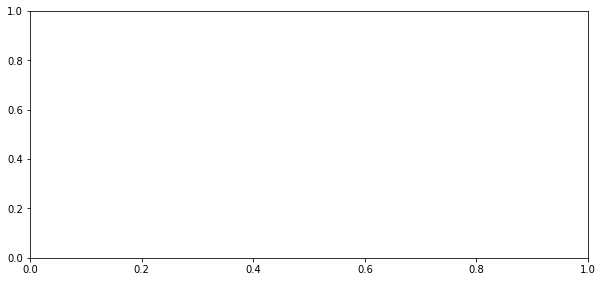

In [51]:
plt.subplot(211)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(mod1.classes_, mod1.predict_proba(tfidfv_test[3])[0])
plt.xlim(-1, 21)
plt.xticks(mod1.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [ ]:
mod.predict(tfidfv_test[3])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(15,15))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

In [ ]:
graph_confusion_matrix(mod, tfidfv_test, y_test)

### 다양한 머신러닝 모델 활용 

#### 1) Complement Naive Bayes Classifier(CNB)
    - 데이터가 불균형할 경우를 대비해서 나이브 베이즈 분류기를 보완한 것이 컴플리먼트 나이브 베이즈 분류기

In [ ]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

In [ ]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#### 2) 소프트맥스 회귀(Softmax Regression)
    - 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수로 

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2',verbose=3)
lr.fit(tfidfv, y_train)

In [ ]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#### 3)결정트리 와 랜덤 포레스트
    - 트리 계열의 모델을 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는 특징이 있음
    - 훈련 데이터에 과적합 되는 경향이 있음
        -이를 랜덤 포레스트에서 개선 -> 서로 다른 방향으로 과적합 된 트리들을 조합하여 과적함을 피할 수 있음

In [ ]:
forest = RandomForestClassifier(n_estimators=5, random_state=0, verbose=3)
forest.fit(tfidfv, y_train)


In [ ]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#### 그래디언트 부스팅 트리 (GradientBoostingClassifier)
    - 랜덤 포레스트와 다르게 이전 트리의 오차를 보완
    - 메모리를 적게 사용하고 예측이 빠름
    - 훈련 시간의 속도는 오래걸린다는 단점이 있음
    - 마찬가지로 희소한 고차원 데이터에 대해서는 잘 동작하지 않음

In [ ]:
grbt = GradientBoostingClassifier(random_state=0,verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

In [ ]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#### Voting 
- 앙상블 방법론
    - 하드 보팅
    - 소프트 보팅
        - 최종 결과물이 나올 확률값을 다 더하고 최종 결과물에 대한 각각의 확률을 구한 뒤 최종값을 도출

In [ ]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

In [ ]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

#### 회고
- 벡터화 과정에서 벡터차원의 불일치를 해결하지 못함
- fit_transform과 transform의 차이에서 비롯된것 같음
    - https://stackoverflow.com/questions/45804133/dimension-mismatch-error-in-countvectorizer-multinomialnb
    - fit()
        - 통계에서 정규분포를 만들게 하기 위해서 𝑥 값에서 평균을 빼고 그 값을 다시 표준편차로 나누어주는 작업을 하는데 이 작업을 하기 위해 평균 𝜇과  표준편차 𝜎를 계산하는 작업이 fit() 이다
    - transform()
        - 정규화 작업
    - fit_transform() 
        - fit()과 transform()을 함께 적용
        - 테스트 세트에도 트레이닝 데이터에 적용되었던 동일한 평균과 표준편차를 적용하기 위해서 이전에 fit_transform()에서 계산된 값들이 저장된 상태에서 transform()에 적용되는 것
        -https://nurilee.com/2020/01/06/sklearn%EC%97%90%EC%84%9C-fit_transform%EA%B3%BC-transform%EC%9D%98-%EC%B0%A8%EC%9D%B4/
- 노드의 순서를 따라서 진행하였음에도 불구하고 에러가 발생함
- 커널 초기화 후에 재실행 하여도 같은 결과가 나옴
    - 데이터크기 설정마다 변수명을 다르게 설정해주었음에도 오류가발생함
    - 어딘가 저장된 설정값을 공유하면서 발생하는 오류인지 잘 모르겠음